# SGD Classifier

We use a classification model to predict which customers will default on their credit card debt. Our estimator implements regularized linear models with stochastic gradient descent (SGD) learning.

## Data

To learn more about the data and all of the data preparation steps, take a look at [this page](/docs/data-credit.ipynb). Here, we simply import a Python script which includes all of the necessary steps.

In [2]:
from data_prep_credit import * 

## Model

[SGD classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# We always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(loss="hinge", 
                                  alpha=0.01, 
                                  max_iter=200, 
                                  fit_intercept=True,
                                  tol=1e-3))

clf.fit(X_train, y_train)

y_pred = clf.fit(X_train, y_train).predict(X_test)


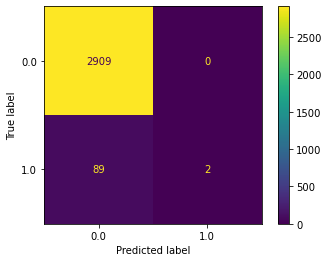

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.98      2909
         Yes       1.00      0.02      0.04        91

    accuracy                           0.97      3000
   macro avg       0.99      0.51      0.51      3000
weighted avg       0.97      0.97      0.96      3000

